Определите AUC_ROC и AUC_PR для модели логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности.
Дополнительное задание(не обязательно): Получите такие же характеристики для линейной регрессии и сравните две модели.

In [10]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from scipy.stats import norm
%matplotlib inline

In [11]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)

In [12]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

In [17]:
class logistic_regression:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations=1000
        self.eta=eta
    def _log_grad(self, X, target):
        m = X.shape[0]
        y=(2*target-1)
        score=np.dot(X, self.w.T).flatten()+self.w0
        Z=-y/(m*(1+np.exp(y*score)))
        grad=Z[np.newaxis, :].dot(X)
        return grad/m, np.sum(Z)/m
    def _optimize(self, X, y):
        for i in range(self.n_iterations):        
            grad_w, grad_w0 = self._log_grad(X, y)
            self.w = self.w-self.eta * grad_w
            self.w0 = self.w0 - self.eta * grad_w0
    def fit(self, X, y):
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        self._optimize(X, y)
    def predict_proba(self, X):  
        '''
        Рассчёт вероятности
        '''
        score=X.dot(self.w.T).flatten()+self.w0
        return 1/(1+np.exp(-score))
    def predict(self, X, thr=0.5):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool) 
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted

In [18]:
mod=logistic_regression()
mod.fit(X_train, y_train)

In [19]:
def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

In [75]:
#матрица ошибок при пороге 0.5
conf = confusion(mod.predict(X_test), y_test)
conf

{'TP': 15, 'FP': 0, 'FN': 1, 'TN': 14}

In [74]:
#матрица ошибок при пороге 0.75
conf = confusion(mod.predict(X_test, 0.75), y_test)
conf

{'TP': 0, 'FP': 0, 'FN': 16, 'TN': 14}

In [47]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1])

In [48]:
y_pred = mod.predict_proba(X_test)
y_pred

array([0.43744861, 0.54703978, 0.38605073, 0.47141598, 0.43928215,
       0.56901128, 0.58140373, 0.54206801, 0.56403656, 0.53568316,
       0.37576184, 0.57432516, 0.47900766, 0.59967655, 0.53516296,
       0.39329824, 0.46380207, 0.37743532, 0.56439493, 0.55547788,
       0.51300754, 0.39603114, 0.42197009, 0.43518686, 0.57091569,
       0.43566684, 0.42581106, 0.5605486 , 0.46916467, 0.57928111])

In [59]:
#построение ROC кривой
import pandas as pd

df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred
})

df = df.sort_values(by='y_pred', ascending=False)

df


,y_true,y_pred
13,1,0.599677
6,1,0.581404
29,1,0.579281
11,1,0.574325
24,1,0.570916
5,1,0.569011
18,1,0.564395
8,1,0.564037
27,1,0.560549
19,1,0.555478


In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

(0, 1)

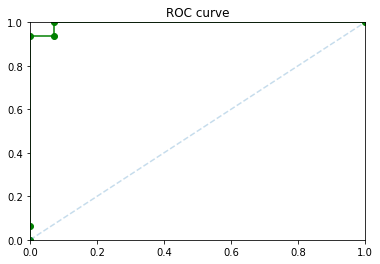

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.title('ROC curve')
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.xlim(0,1)
plt.ylim(0,1)

In [69]:
#площадь под кривой
roc_auc_score(y_test, y_pred)

0.9955357142857143

In [70]:
#построение PR кривой
bins_pos=df['y_true']
bins_neg=1-df['y_true']
num_pos, num_neg=np.sum(bins_pos), np.sum(bins_neg)
recall = np.concatenate([[0], np.cumsum(bins_neg)/num_neg])


In [71]:


precision=np.cumsum(bins_neg)/(np.cumsum(bins_neg)+np.cumsum(bins_pos))


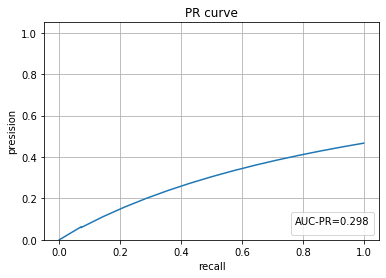

In [72]:
AUC_PR = np.sum(precision*(recall[1:]-recall[:-1]))

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall[1:], precision)